In [21]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from pandas_datareader import data
from datetime import datetime


In [22]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [23]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [24]:
for stock in tech_list:
    globals()[stock] = data.get_data_yahoo(stock,start,end)

In [25]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,150.528347,147.458681,148.894055,149.084646,8.712419e+07,148.690776
std,16.798657,16.045500,16.451321,16.423771,2.548109e+07,16.609110
min,120.400002,118.860001,119.540001,119.900002,4.100000e+07,119.191582
25%,135.152496,133.294998,134.537498,134.399998,6.904782e+07,133.605915
50%,149.434998,146.870003,148.434998,148.519997,8.347055e+07,147.944191
75%,164.840004,159.700001,162.257496,162.292503,9.919398e+07,162.086002
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


In [26]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-03-22 to 2022-03-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


<AxesSubplot:xlabel='Date'>

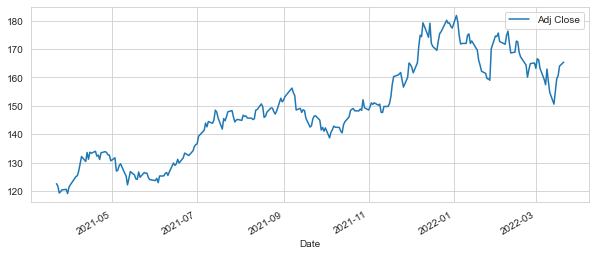

In [27]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

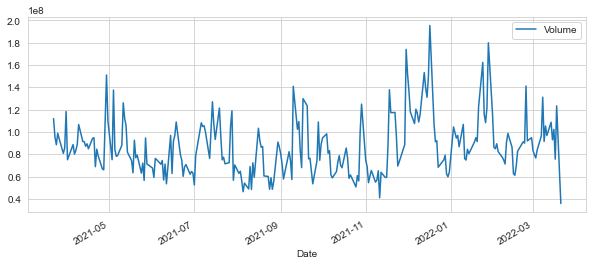

In [12]:
# Total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [28]:
# Calculate moving average of stocks (Apple)
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

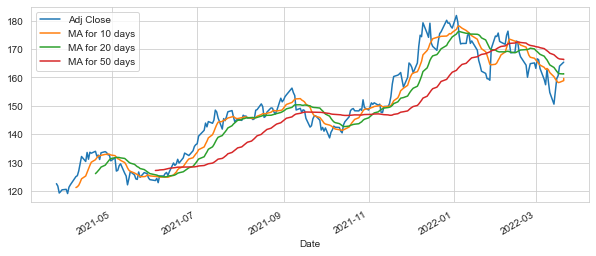

In [29]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

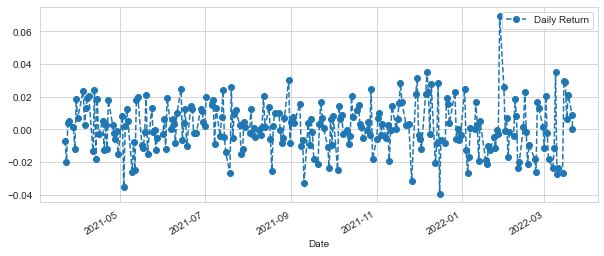

In [30]:
# Daily returns and risk of the stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

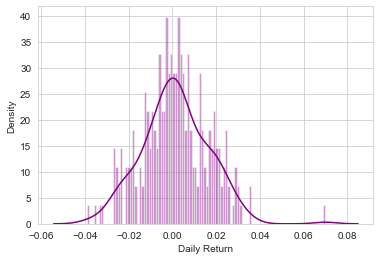

In [31]:
# Average daily returns
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

<AxesSubplot:>

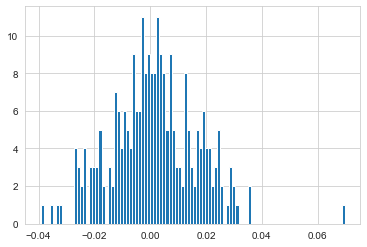

In [32]:
AAPL['Daily Return'].hist(bins=100)

In [47]:
# Returns of all stock, building dataframe with all stocks Adj closing prices
closing_df = data.get_data_yahoo(tech_list,start,end)['Adj Close']

In [48]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-03-22,122.660965,2038.589966,234.083298,3110.870117
2021-03-23,121.815987,2052.959961,235.660431,3137.500000
2021-03-24,119.380455,2045.060059,233.557571,3087.070068
2021-03-25,119.877502,2044.359985,230.462799,3046.260010
2021-03-26,120.493835,2035.550049,234.569336,3052.030029
...,...,...,...,...
2022-03-16,159.589996,2673.810059,294.390015,3062.080078
2022-03-17,160.619995,2692.010010,295.220001,3144.780029
2022-03-18,163.979996,2736.030029,300.429993,3225.010010


In [49]:
tech_returns = closing_df.pct_change()
tech_returns

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-03-22,NaN,NaN,NaN,NaN
2021-03-23,-0.006889,0.007049,0.006737,0.008560
2021-03-24,-0.019994,-0.003848,-0.008923,-0.016073
2021-03-25,0.004164,-0.000342,-0.013251,-0.013220
2021-03-26,0.005141,-0.004309,0.017819,0.001894
...,...,...,...,...
2022-03-16,0.029015,0.031081,0.025213,0.038934
2022-03-17,0.006454,0.006807,0.002819,0.027008
2022-03-18,0.020919,0.016352,0.017648,0.025512


C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: cannot reindex from a duplicate axis

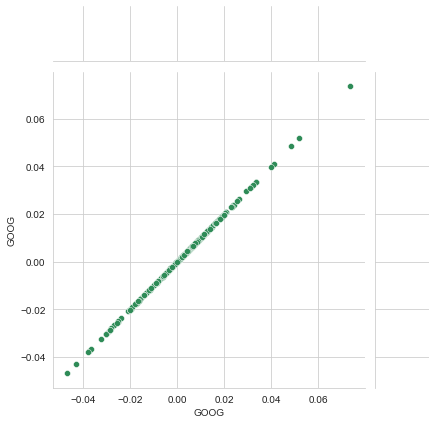

In [37]:
# Comparing daily returns of two stocks
sns.jointplot('GOOG','GOOG',tech_returns,kind='scatter',color='seagreen')
# Perfect linear relationship correlations

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: cannot reindex from a duplicate axis

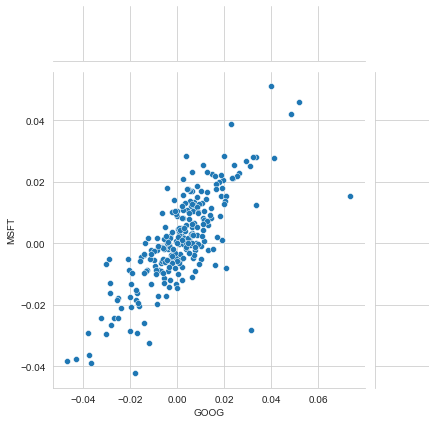

In [38]:
# Between microsoft and google
sns.jointplot('GOOG','MSFT',tech_returns,kind='scatter')

In [44]:
# Comparison analysis plot using pairplots
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-03-22,NaN,NaN,NaN,NaN
2021-03-23,-0.006889,0.007049,0.006737,0.008560
2021-03-24,-0.019994,-0.003848,-0.008923,-0.016073
2021-03-25,0.004164,-0.000342,-0.013251,-0.013220
2021-03-26,0.005141,-0.004309,0.017819,0.001894


ValueError: cannot reindex from a duplicate axis

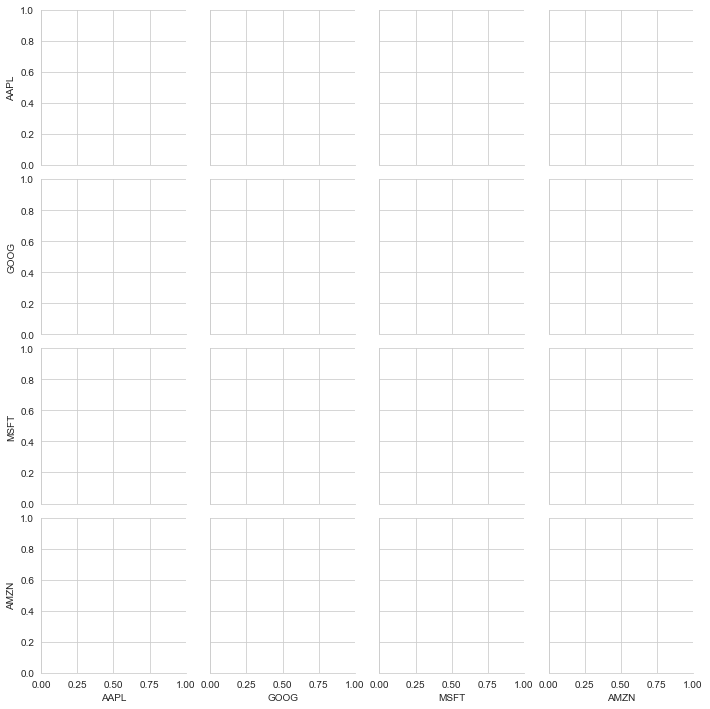

In [45]:
sns.pairplot(tech_returns.dropna())

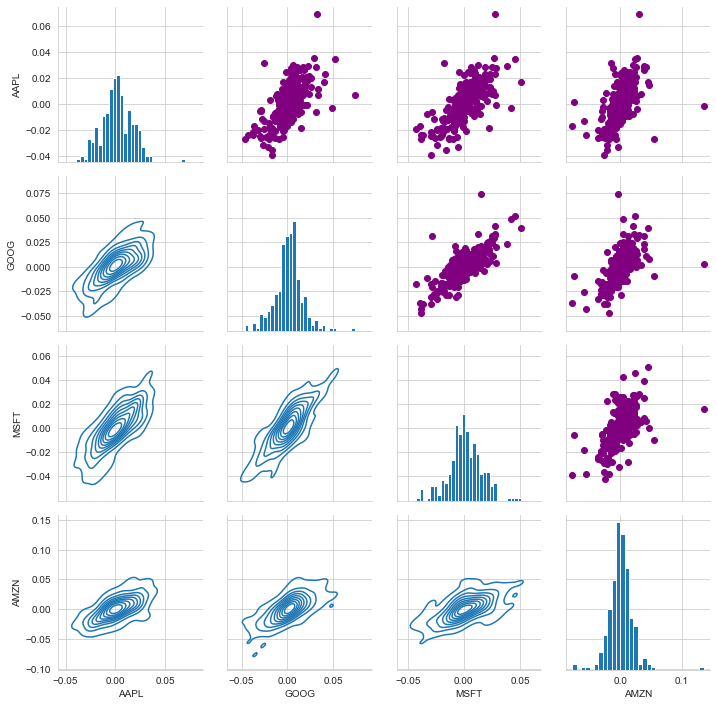

In [26]:
returns_fig = sns.PairGrid(tech_returns.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,palette='cool d')
returns_fig.map_diag(plt.hist,bins=30)

ValueError: cannot reindex from a duplicate axis

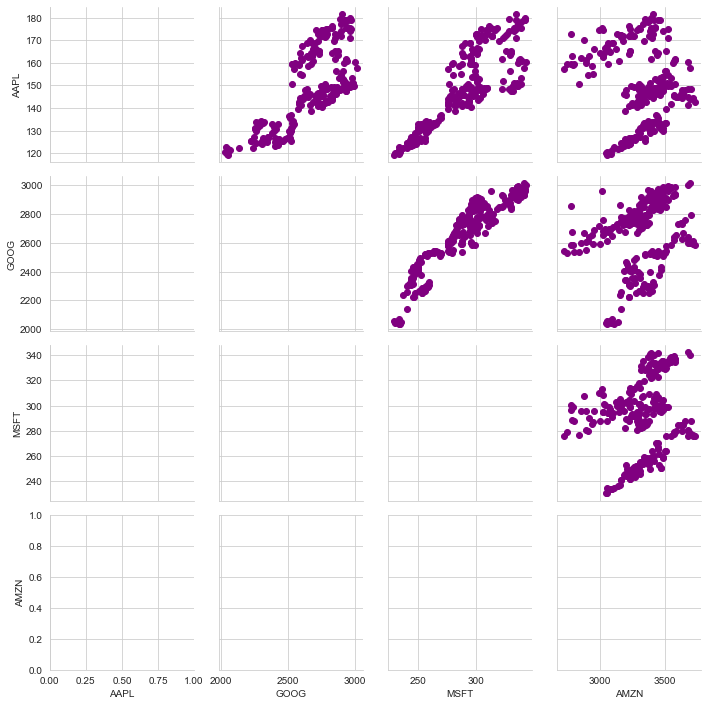

In [52]:
returns_fig = sns.PairGrid(closing_df.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,palette='cool d')
returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

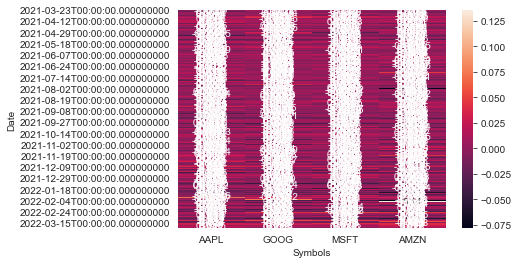

In [37]:
# Individual correlation plot for daily returns
sns.heatmap(tech_returns.dropna(),annot=True)

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

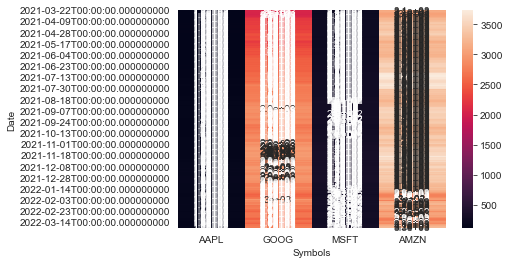

In [38]:
# Individual correlation plots for closing prices
sns.heatmap(closing_df.dropna(),annot=True)

In [54]:
# Risk Analysis
returns = tech_returns.dropna()

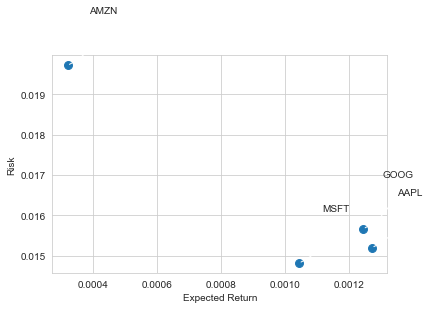

In [19]:
# Defining area for scatter plot cirlce
area = np.pi*20
plt.scatter(returns.mean(),returns.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

C:\Users\Abhinav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

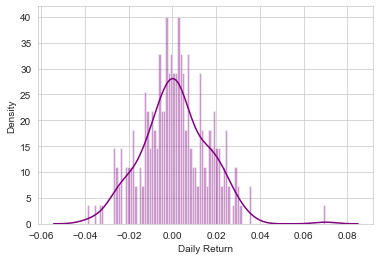

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [55]:
# Quantile to get risk value of the stock
# This means that with 95% assurance you may only loose 2.4 percent of your stock (at worst)
returns['AAPL'].quantile(0.05)

-0.02418746060856338

In [56]:
# Setting up the time line for risk prediction
days = 365
dt = 1 / days
# Drift mu
mu = returns.mean()['GOOG']
# Sigma (Volatility of the stock)
sigma = returns.std()['GOOG']

In [59]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
    return price
    

In [60]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-22,2057.989990,2026.069946,2041.839966,2038.589966,1954800,2038.589966
2021-03-23,2072.302002,2039.219971,2051.699951,2052.959961,1367000,2052.959961
2021-03-24,2078.209961,2041.555054,2065.370117,2045.060059,1154000,2045.060059
2021-03-25,2058.870117,2010.729980,2044.810059,2044.359985,1418900,2044.359985
2021-03-26,2050.989990,2014.020020,2038.859985,2035.550049,1493500,2035.550049


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

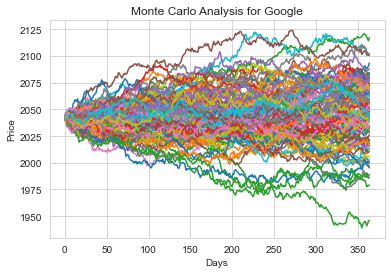

In [61]:
start_price = 2041.839966

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [63]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

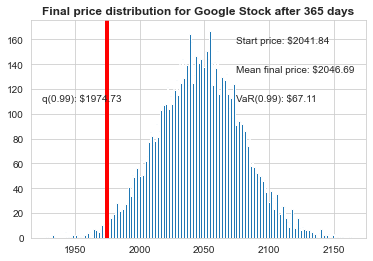

In [65]:
q = np.percentile(simulations,1)
plt.hist(simulations,bins=200)
# Starting price
plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

# Mean ending price
plt.figtext(0.6,0.7,"Mean final price: $%.2f" %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');